In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
#
from sklearn.feature_selection import SelectKBest                      
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
#
import random
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Data.csv')
data.head(3)

,Date,KO: Open,KO: High,KO: Low,KO: Close,KO: Volume,SB=F: Open,SB=F: Close,SB=F: Average,KC=F: Open,KC=F: Close,KC=F: Average,KO: Next Day Closing
0,04/01/2010,28.58,28.61,28.45,28.52,13870400,27.00,27.62,27.31,136.00,141.85,138.93,28.17
1,05/01/2010,28.42,28.50,28.07,28.17,23172400,27.50,27.64,27.57,141.85,141.00,141.43,28.17
2,06/01/2010,28.17,28.22,27.99,28.17,19264600,27.63,28.41,28.02,141.60,141.60,141.60,28.09


In [3]:
X = data.loc[:, 'KO: Open':'KC=F: Average'].to_numpy()
y = data.loc[:, 'KO: Next Day Closing'].to_numpy()

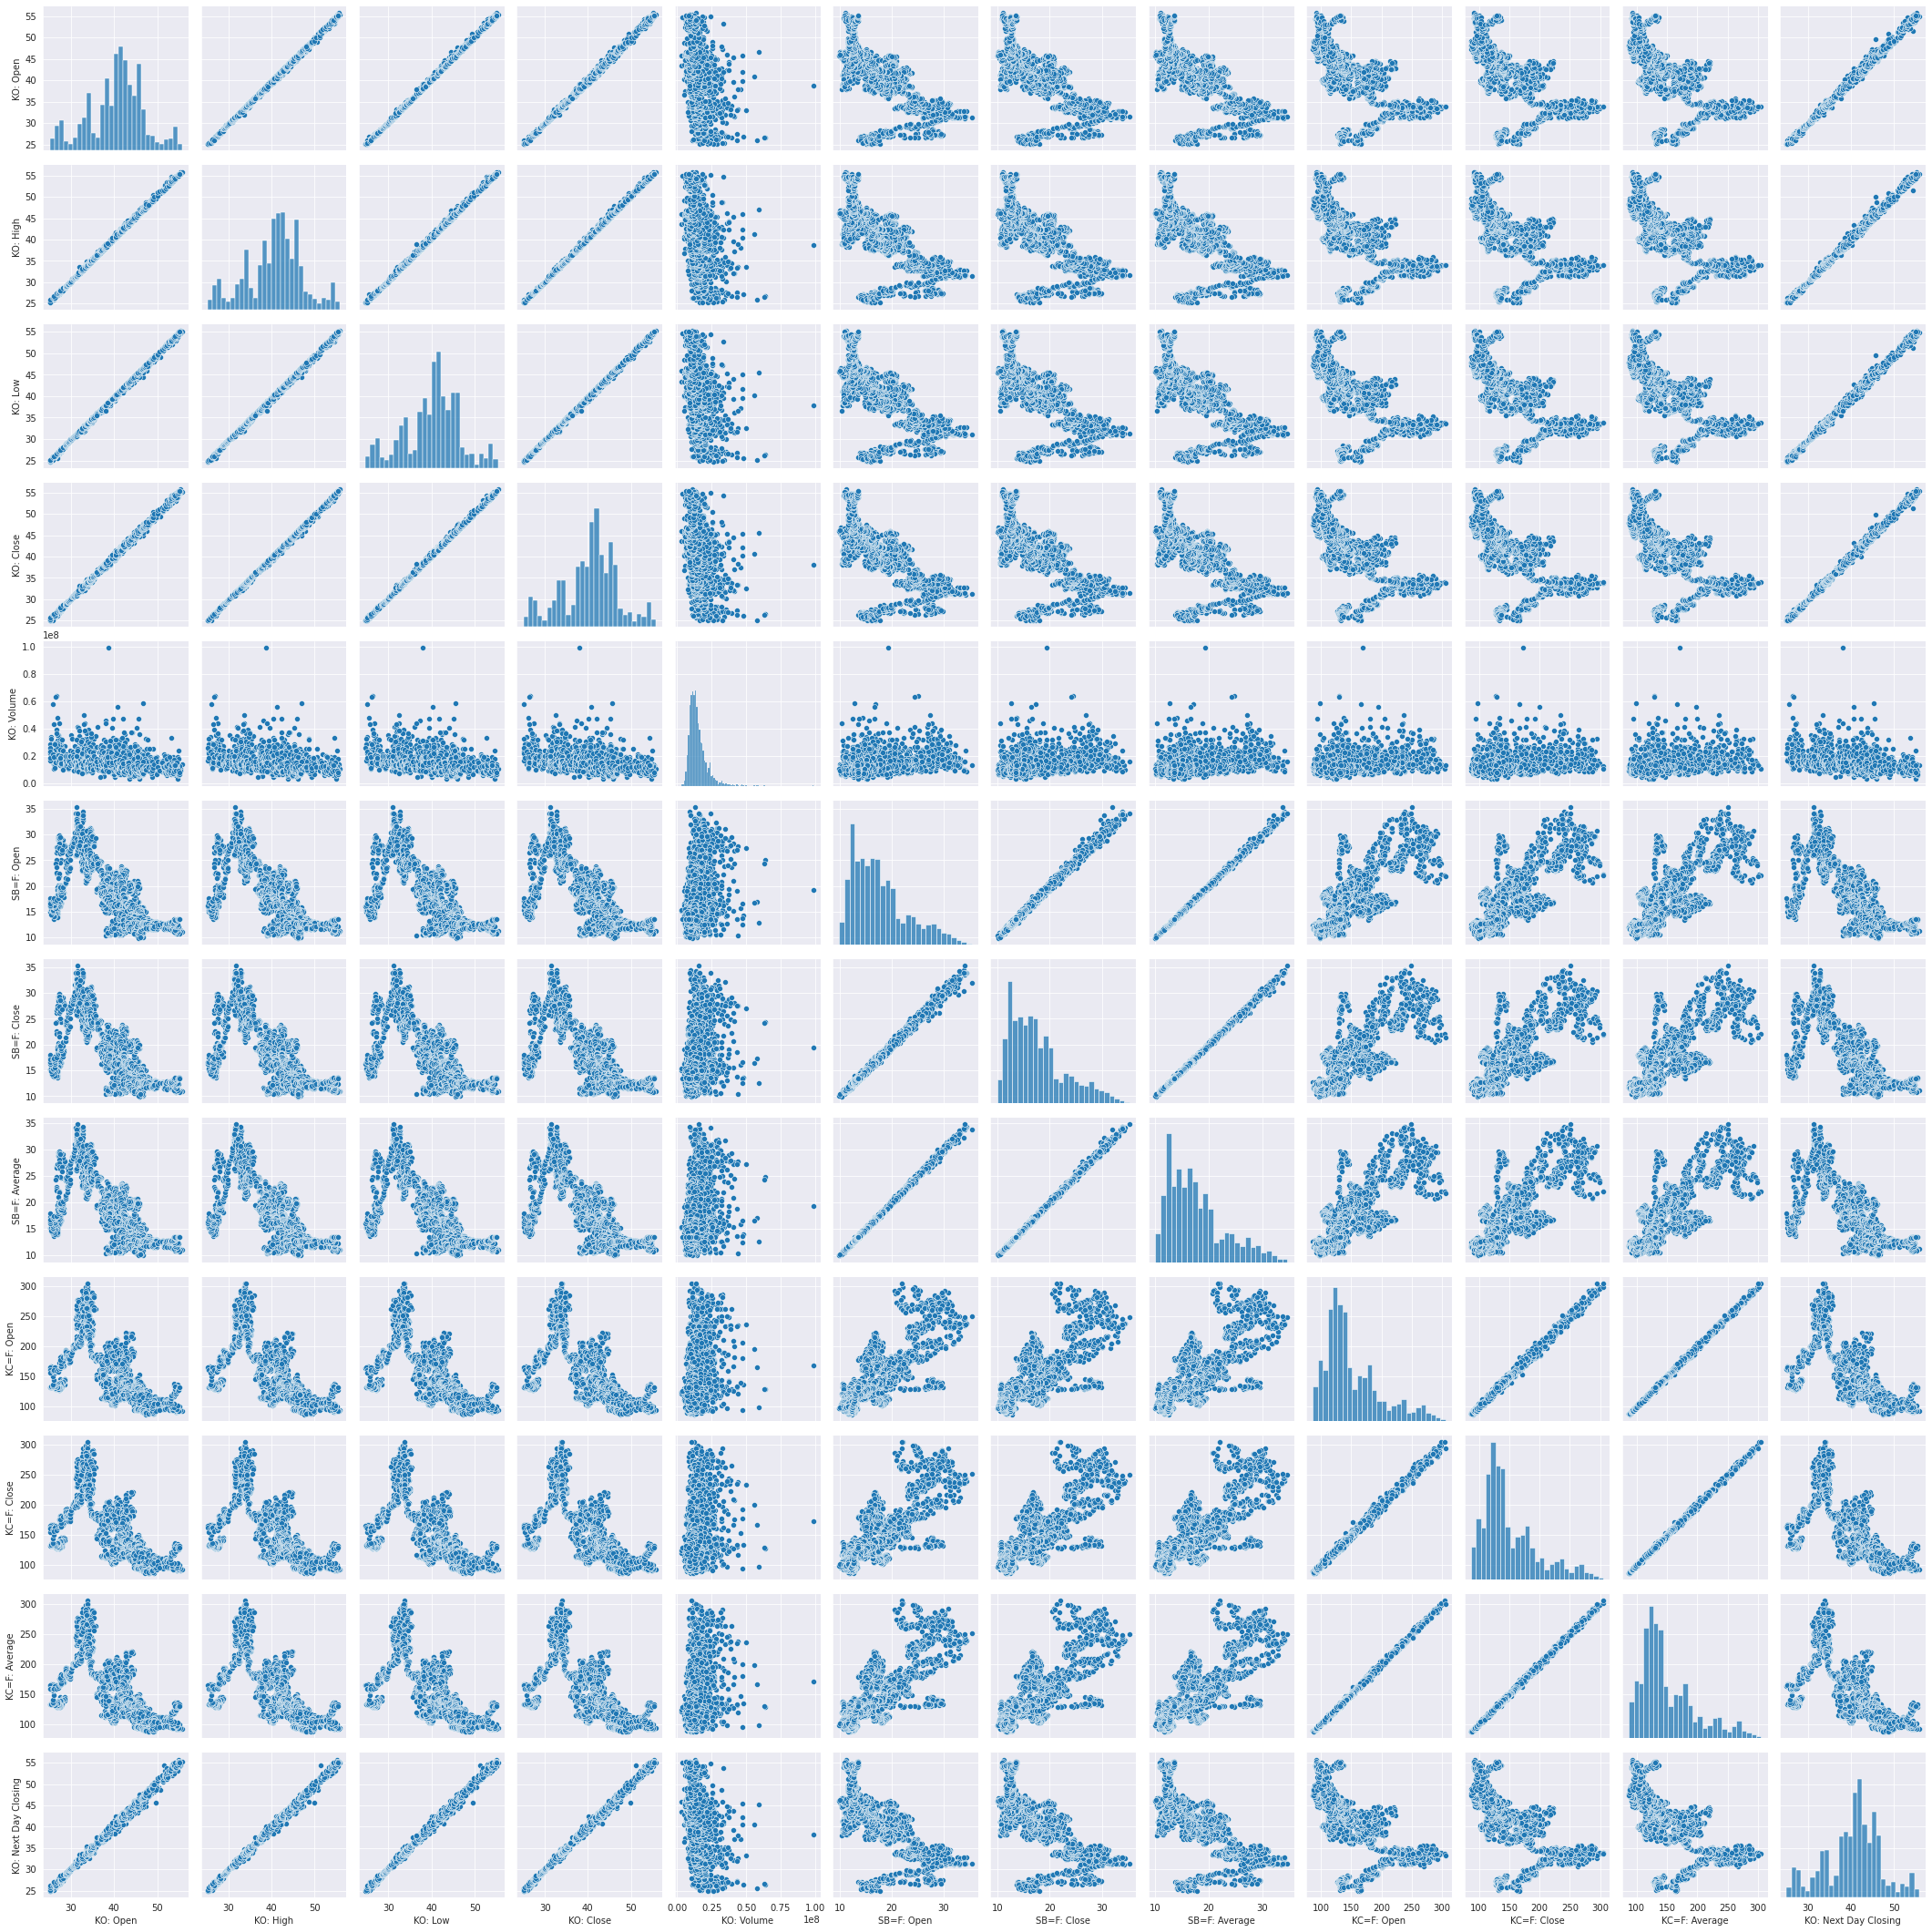

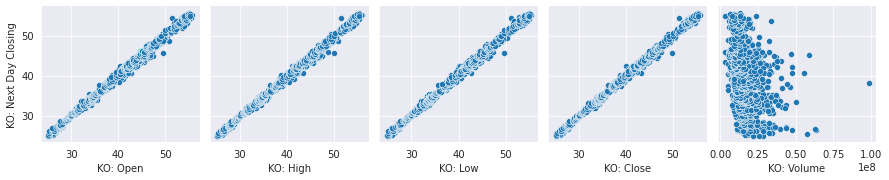

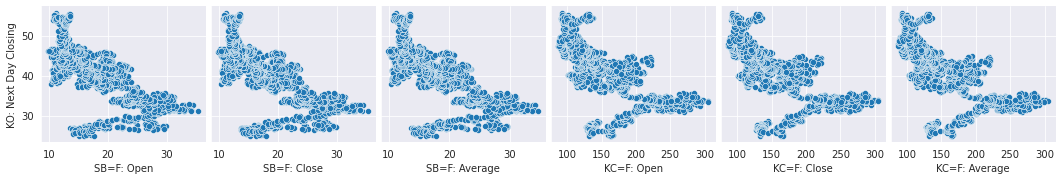

In [4]:
sns.pairplot(data)
sns.pairplot(
    data,
    x_vars=["KO: Open", "KO: High", "KO: Low", "KO: Close", "KO: Volume"],
    y_vars=["KO: Next Day Closing"]
)
sns.pairplot(
    data,
    x_vars=["SB=F: Open", "SB=F: Close", "SB=F: Average", "KC=F: Open", "KC=F: Close", "KC=F: Average"],
    y_vars=["KO: Next Day Closing"]
)

F-Scores of Features:
Feature 0: 343324.660144
Feature 1: 433355.425698
Feature 2: 424892.758577
Feature 3: 537690.818394
Feature 4: 332.282862
Feature 5: 1625.977702
Feature 6: 1628.953765
Feature 7: 1631.258063
Feature 8: 1046.145036
Feature 9: 1051.016127
Feature 10: 1050.276037


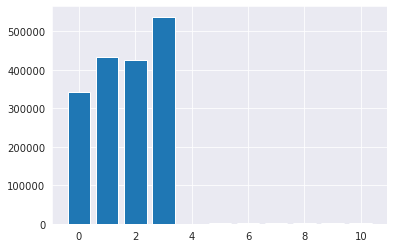

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split X set into training and remaining sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature selection
print("F-Scores of Features:")
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
data = pd.read_csv('Data.csv')
data.columns

Index(['Date', 'KO: Open', 'KO: High', 'KO: Low', 'KO: Close', 'KO: Volume',
       'SB=F: Open', 'SB=F: Close', 'SB=F: Average', 'KC=F: Open',
       'KC=F: Close', 'KC=F: Average', 'KO: Next Day Closing'],
      dtype='object')

In [7]:
# reprocess data by dropping Volume, KC=F: Open, KC=F: Close, SB=F: Open, SB=F: Close.
data = data.drop(columns=['KO: Volume', 'KC=F: Open', 'KC=F: Close', 'SB=F: Open', 'SB=F: Close'])
data.head(3)


X = data.loc[:, 'KO: Open':'KC=F: Average'].to_numpy()
y = data.loc[:, 'KO: Next Day Closing'].to_numpy()

# split X set into training and remaining sets

split = int(len(X)*0.8)
X_train, X_rem, y_train, y_rem = X[:split], X[split:], y[:split], y[split:]

dates = np.arange(len(X_rem))
# split remaining set into validation and testing sets
X_val, X_test, y_val, y_test, d1, d2 = train_test_split(X_rem, y_rem, dates, test_size=0.4, random_state=42, shuffle=False)

In [8]:
dates_train = np.array(data.iloc[:split]['Date'])
print(dates_train.shape)
#dates_train

(2009,)


In [9]:
dates_test = np.array(data.iloc[d2+split]['Date'])
print(dates_test.shape)
#dates_test

(202,)


In [10]:
dates_val = np.array(data.iloc[d1+split]['Date'])
print(dates_val.shape)
#dates_val

(301,)


In [11]:
data.head(5)

,Date,KO: Open,KO: High,KO: Low,KO: Close,SB=F: Average,KC=F: Average,KO: Next Day Closing
0,04/01/2010,28.58,28.61,28.45,28.52,27.31,138.93,28.17
1,05/01/2010,28.42,28.50,28.07,28.17,27.57,141.43,28.17
2,06/01/2010,28.17,28.22,27.99,28.17,28.02,141.60,28.09
3,07/01/2010,28.17,28.18,27.88,28.09,28.12,141.72,27.58
4,08/01/2010,27.73,27.82,27.38,27.58,27.73,143.90,28.14


In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2009, 6)
Shape of y_train:  (2009,)
Shape of X_val:  (301, 6)
Shape of y_val:  (301,)
Shape of X_test:  (202, 6)
Shape of y_test:  (202,)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
tr_error = mean_squared_error(y_train, y_train_pred)
accuracy = 1-tr_error
y_pred_val = lr.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)

print('Linear Regression\nTraining error = {:.5}\nValidation error = {:.5}'.format(tr_error, val_error))    

Linear Regression
Training error = 0.12077
Validation error = 0.25447


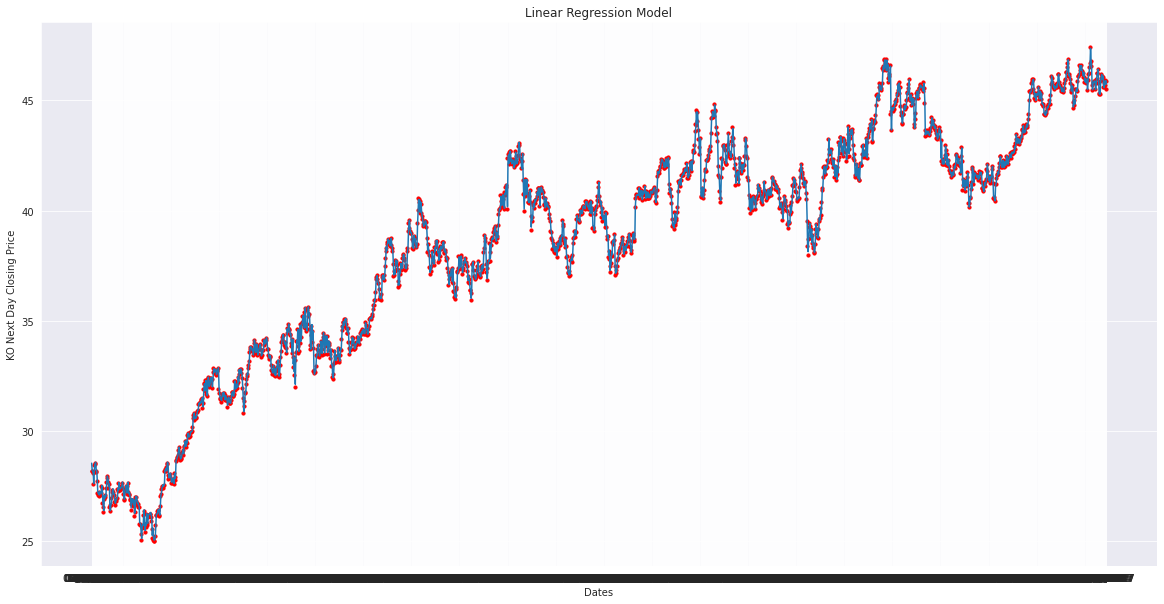

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(dates_train, y_train_pred, label = "Model")
plt.scatter(dates_train, y_train, color="r", s=10, label="Train Datapoints")
plt.title('Linear Regression Model')
plt.xlabel('Dates')
plt.ylabel('KO Next Day Closing Price')
plt.show()

In [19]:
print('The shape of y_pred is: ', y_train_pred.shape) #to check that the shape of the predicted y is the same as the training y

print('The prediction accuracy is: ', accuracy)    # print the training error
print("w1 = ", lr.coef_)   # print the learnt w1
print("w0 = ", lr.intercept_)

The shape of y_pred is:  (2009,)
The prediction accuracy is:  0.879227983530783
w1 =  [-1.65261362e-02  1.30033830e-01  6.70219746e-02  8.16205513e-01
 -1.21143599e-03  2.19497010e-05]
w0 =  0.14131042370286906


Polynomial degree =  1
Polynomial degree = 1
Training error = 0.12077
Validation error = 0.25447
Polynomial degree =  2
Polynomial degree = 2
Training error = 0.11868
Validation error = 0.25575
Polynomial degree =  3
Polynomial degree = 3
Training error = 0.11223
Validation error = 0.37462


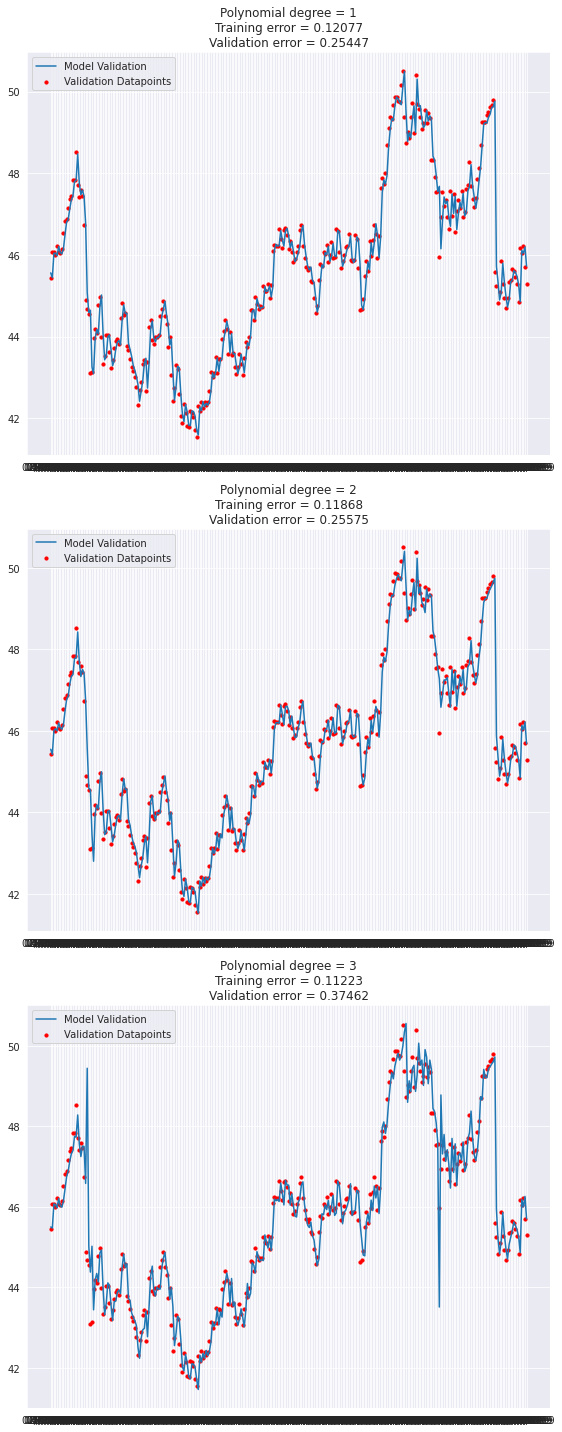

In [20]:
## define a list of values for polynomial degrees 
degrees = [1, 2, 3]    

# declare an array variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []         

plt.figure(figsize=(8, 20))  
for i, degree in enumerate(degrees):    # use for-loop to fit polynomial regression models with different degrees
    plt.subplot(len(degrees), 1, i + 1) 
    
    print("Polynomial degree = ",degree)
    
    lin_regr = LinearRegression(fit_intercept = False)
    
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    # y_pred_train = ...    # predict values for the training data using the linear model
    # tr_error = ...    # calculate the training error
    # X_val_poly = ... # transform the raw features for the validation data 
    # y_pred_val = ... # predict values for the validation data using the linear model 
    # val_error = ... # calculate the validation error
    
    # YOUR CODE HERE
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    print('Polynomial degree = {}\nTraining error = {:.5}\nValidation error = {:.5}'.format(degree, tr_error, val_error))    # set the title    # show the plot

    plt.tight_layout()
    plt.plot(dates_val, y_pred_val, label="Model Validation")
    plt.scatter(dates_val, y_val, color="r", s=10, label="Validation Datapoints")
    plt.legend(loc="best")
    plt.title(f'Polynomial degree = {degree}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
   

# sanity check 
assert len(tr_errors) == 3 # check the length of array tr_errors


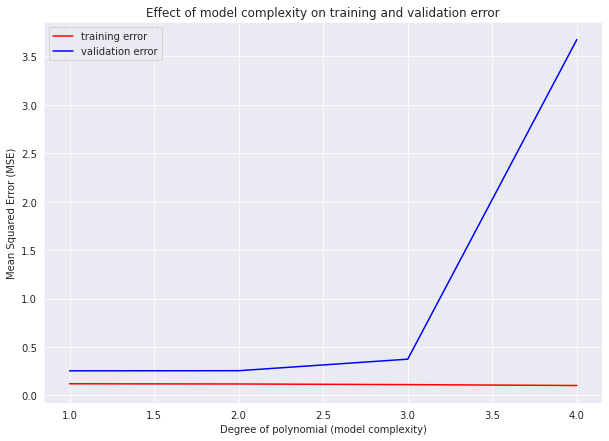

In [98]:
train_errs = []
val_errs = []

def train_validate_poly(X_train, y_train, X_val, y_val, model=LinearRegression, degree=5):
    # train a polynomial model and validate it

    # generate polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    # learn the model and validate it
    reg = model()
    reg = reg.fit(X_train_poly, y_train)
    y_train_pred = reg.predict(X_train_poly)
    y_val_pred = reg.predict(X_val_poly)
    train_err = mean_squared_error(y_train, y_train_pred)
    val_err = mean_squared_error(y_val, y_val_pred)
    return reg, train_err, val_err


# get training and validation error for different degrees
orders = range(1, 5)
for order in orders:
    _, train_err, val_err = train_validate_poly(X_train, y_train, X_val, y_val, degree=order)
    train_errs.append(train_err)
    val_errs.append(val_err)

# create the plot
fig, axs = plt.subplots(figsize=(10, 7))
axs.plot(orders, train_errs, color='red', label='training error')
axs.plot(orders, val_errs, color='blue', label='validation error')
axs.set_xlabel('Degree of polynomial (model complexity)')
axs.set_ylabel('Mean Squared Error (MSE)')
axs.set_title('Effect of model complexity on training and validation error')
axs.legend()

In [21]:
lin_regr = LinearRegression(fit_intercept=False) 
poly = PolynomialFeatures(degree=1)    # generate polynomial features with degree of 1
X_train_poly = poly.fit_transform(X_train)    # fit the test features
lin_regr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_pred_test = lin_regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)

In [22]:
print("The final test error using the Linear Regression (Polynomial Degree = 1) is: ",test_error)

The final test error using the Linear Regression (Polynomial Degree = 1) is:  0.2381176511514003


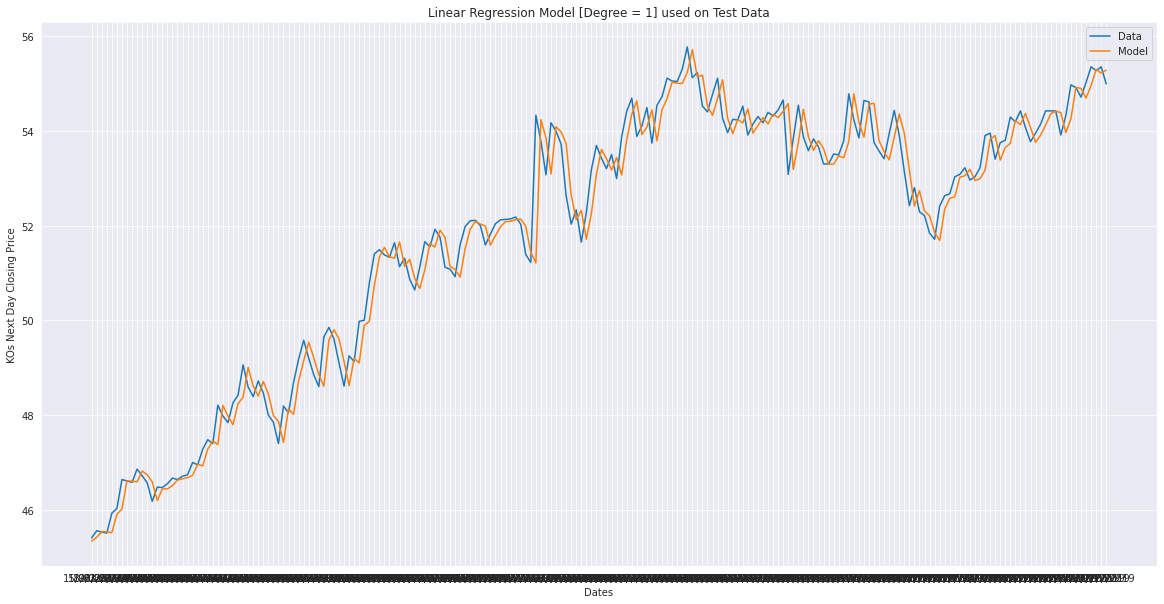

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(dates_test, y_test, label = "Data")
plt.plot(dates_test, y_pred_test, label = "Model")
plt.title('Linear Regression Model [Degree = 1] used on Test Data')
plt.xlabel('Dates')
plt.ylabel('KOs Next Day Closing Price')
plt.legend(loc="best")
plt.show()